In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
coffee=pd.read_csv('/content/coffeeQuality - coffeeQuality.csv')

In [3]:
coffee.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
coffee.shape

(1339, 44)

In [20]:
#3. Identify and handle missing values in the dataset. (Hint: impute with mean/median for  numeric and mode for categorical).
missing= coffee.isnull().sum()
print("Missing values per column:\n", missing)
numeric_cols = coffee.select_dtypes(include=['float', 'int']).columns
imputer = KNNImputer(n_neighbors=4)
coffee[numeric_cols] = imputer.fit_transform(coffee[numeric_cols])
coffee


Missing values per column:
 Unnamed: 0                 0
Species                    0
Country.of.Origin          1
Farm.Name                359
Mill                     318
ICO.Number               159
Altitude                 226
Region                    59
Producer                 232
Number.of.Bags             0
Bag.Weight                 0
In.Country.Partner         0
Harvest.Year              47
Grading.Date               0
Owner.1                    7
Variety                  226
Processing.Method        170
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean.Cup                  0
Sweetness                  0
Cupper.Points              0
Total.Cup.Points           0
Moisture                   0
Category.One.Defects       0
Quakers                    0
Color                    270
Category.Two.Defects       0
Expiration     

,Unnamed: 0,Species,Country.of.Origin,Farm.Name,Mill,ICO.Number,Altitude,Region,Producer,Number.of.Bags,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0.0,Arabica,Ethiopia,metad plc,metad plc,2014/2015,1950-2200,guji-hambela,METAD PLC,300.0,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1.0,Arabica,Ethiopia,metad plc,metad plc,2014/2015,1950-2200,guji-hambela,METAD PLC,300.0,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2.0,Arabica,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,1600 - 1800 m,NaN,NaN,5.0,...,NaN,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3.0,Arabica,Ethiopia,yidnekachew dabessa coffee plantation,wolensu,NaN,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320.0,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4.0,Arabica,Ethiopia,metad plc,metad plc,2014/2015,1950-2200,guji-hambela,METAD PLC,300.0,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334.0,Robusta,Ecuador,robustasa,our own lab,NaN,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,1.0,...,Blue-Green,1.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,1000.4,1000.4,1000.4
1335,1335.0,Robusta,Ecuador,robustasa,own laboratory,NaN,40,"san juan, playas",Café Robusta del Ecuador S.A.,1.0,...,Blue-Green,0.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336.0,Robusta,United States,fazenda cazengo,cafe cazengo,NaN,795 meters,"kwanza norte province, angola",Cafe Cazengo,1.0,...,NaN,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337.0,Robusta,India,NaN,NaN,14-1118-2014-0087,NaN,NaN,NaN,1.0,...,Green,1.0,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,1000.4,1000.4,1000.4


In [10]:
coffee=coffee.drop(['Lot.Number','Owner','Company'],axis=1)
coffee

,Unnamed: 0,Species,Country.of.Origin,Farm.Name,Mill,ICO.Number,Altitude,Region,Producer,Number.of.Bags,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,Ethiopia,metad plc,metad plc,2014/2015,1950-2200,guji-hambela,METAD PLC,300.0,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,Ethiopia,metad plc,metad plc,2014/2015,1950-2200,guji-hambela,METAD PLC,300.0,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,1600 - 1800 m,NaN,NaN,5.0,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,Ethiopia,yidnekachew dabessa coffee plantation,wolensu,NaN,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320.0,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,Ethiopia,metad plc,metad plc,2014/2015,1950-2200,guji-hambela,METAD PLC,300.0,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,Ecuador,robustasa,our own lab,NaN,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,1.0,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,Ecuador,robustasa,own laboratory,NaN,40,"san juan, playas",Café Robusta del Ecuador S.A.,1.0,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,United States,fazenda cazengo,cafe cazengo,NaN,795 meters,"kwanza norte province, angola",Cafe Cazengo,1.0,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,India,NaN,NaN,14-1118-2014-0087,NaN,NaN,NaN,1.0,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [13]:
coffee['Processing.Method']

,Processing.Method
0,Washed / Wet
1,Washed / Wet
2,NaN
3,Natural / Dry
4,Washed / Wet
...,...
1334,NaN
1335,NaN
1336,Natural / Dry
1337,Natural / Dry


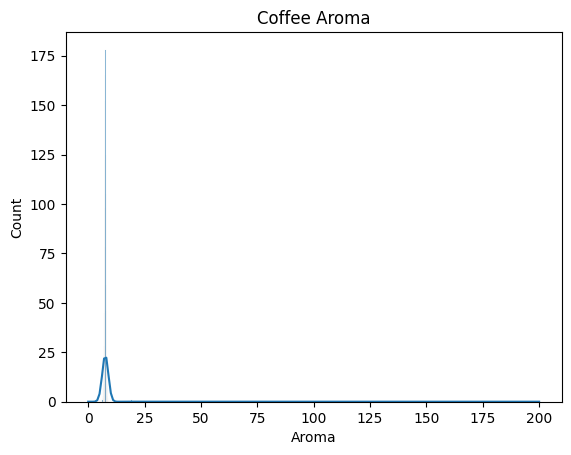

In [36]:
sns.histplot(data=coffee['Aroma'],kde=True)
plt.title('Coffee Aroma')
plt.show()

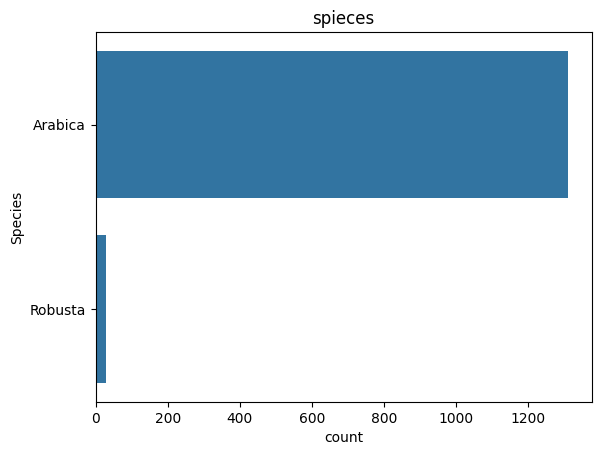

In [34]:
sns.countplot(data=coffee['Species'])
plt.title('spieces')
plt.show()
#Arabica spieces are more dominating

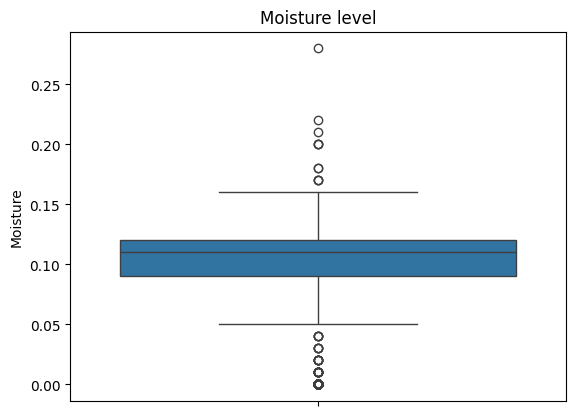

In [38]:
sns.boxplot(data=coffee['Moisture'],fill= True)
plt.title('Moisture level')
plt.show()
#some coffee are less moisture

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20844 (\N{CJK UNIFIED IDEOGRAPH-516C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23610 (\N{CJK UNIFIED IDEOGRAPH-5C3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


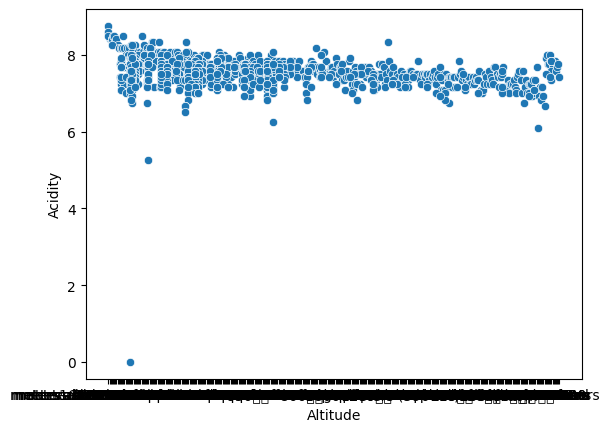

In [39]:

sns.scatterplot(x='Altitude',y='Acidity',data=coffee)
plt.title=('Relationship between altitude and acidity')
plt.show()

In [40]:
#altitude and acidity are highly related

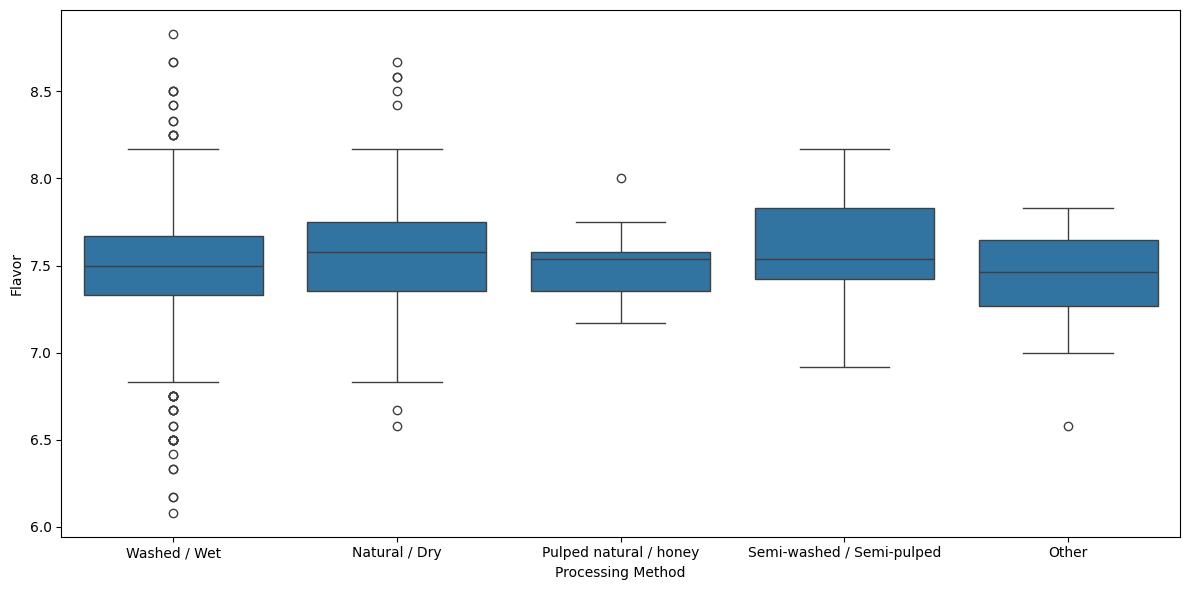

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Processing.Method', y='Flavor', data=coffee)
plt.xlabel('Processing Method')
plt.ylabel('Flavor')
plt.tight_layout()
plt.show()

Semi-washed/Semi-pulped obtained the higher flavor score

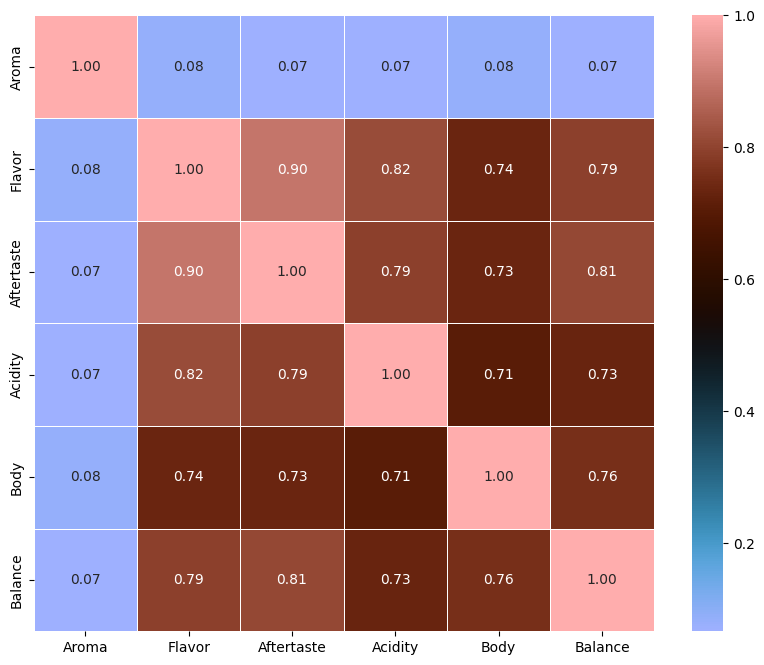

In [58]:
quality_measures = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']
data = coffee[quality_measures]
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='berlin', fmt=".2f", linewidths=0.5)
plt.show()

flavor and After taste two variables
appear most strongly correlated

In [86]:
grouped_aroma = coffee.groupby(['Species', 'Processing.Method', 'Country.of.Origin'])['Aroma'].mean()
print(grouped_aroma)
print(grouped_aroma.max())

Species  Processing.Method  Country.of.Origin
Arabica  Natural / Dry      Brazil               7.516125
                            China                7.833333
                            Colombia             7.685185
                            Ecuador              7.500000
                            El Salvador          8.420000
                                                   ...   
         Washed / Wet       Zambia               7.670000
Robusta  Natural / Dry      India                7.542500
                            United States        7.625000
                            Vietnam              6.750000
         Washed / Wet       India                7.780000
Name: Aroma, Length: 84, dtype: float64
9.708333333333334


Maximum of the Aroma is of '9.70233233'

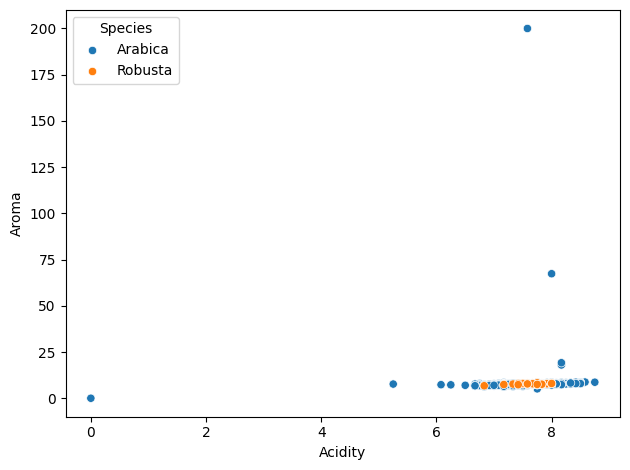

In [81]:
sns.scatterplot(x='Acidity', y='Aroma',hue='Species',data=coffee)
plt.xlabel('Acidity')
plt.ylabel('Aroma')
plt.legend(title='Species')
plt.tight_layout()
plt.show()

In [95]:
x=coffee[['Altitude']]
y=coffee['Acidity']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

17. 1.Focus in flavor and aroma for imporving business
    2.Moisture maintanance imporvise high profit.
    3.Have to reduce the acidity level
18. Farmers should focus on improving Robusta sales and optimization
